In [1]:
import tensorflow as tf
import os
import zipfile
import os
import zipfile

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

In [3]:
base_path = '/datadrive/dataForSamplePrograms/cats_and_dogs_filtered'

train_dir = os.path.join(base_path,'train')
validation_dir = os.path.join(base_path, 'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join('validation_dir','cats')
validation_dogs_dir = os.path.join('validation_dir','dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.962.jpg', 'cat.415.jpg', 'cat.652.jpg', 'cat.454.jpg', 'cat.688.jpg', 'cat.736.jpg', 'cat.216.jpg', 'cat.344.jpg', 'cat.373.jpg', 'cat.764.jpg']
['dog.335.jpg', 'dog.199.jpg', 'dog.483.jpg', 'dog.95.jpg', 'dog.960.jpg', 'dog.383.jpg', 'dog.898.jpg', 'dog.503.jpg', 'dog.945.jpg', 'dog.105.jpg']


In [7]:
nrows=4
ncols=4

pic_index = 0

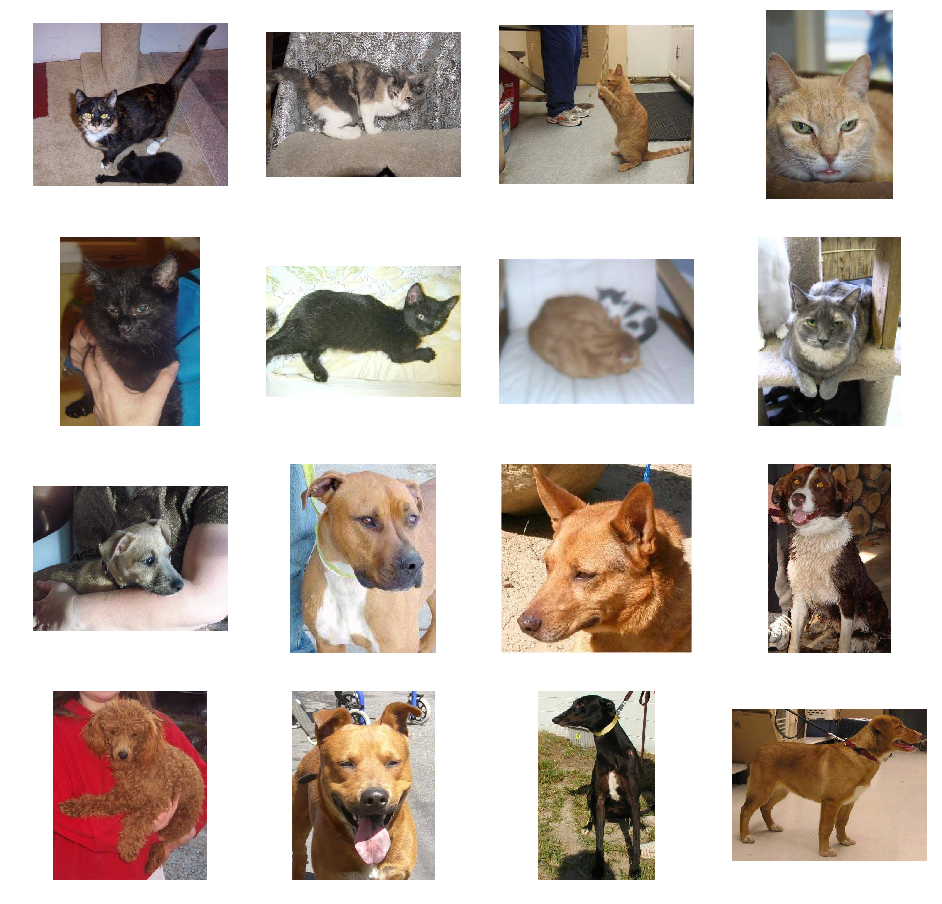

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]


for i,img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()   

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Data Augmentation for training data set
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  valid_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 8s 955ms/step - loss: 3.5214 - accuracy: 0.5063 - val_loss: 0.7020 - val_accuracy: 0.4938
Epoch 2/100
8/8 [==============================] - 7s 921ms/step - loss: 0.7011 - accuracy: 0.5063 - val_loss: 0.7077 - val_accuracy: 0.4875
Epoch 3/100
8/8 [==============================] - 5s 646ms/step - loss: 0.6993 - accuracy: 0.4750 - val_loss: 0.6695 - val_accuracy: 0.5750
Epoch 4/100
8/8 [==============================] - 4s 547ms/step - loss: 0.6980 - accuracy: 0.4938 - val_loss: 0.6817 - val_accuracy: 0.5250
Epoch 5/100
8/8 [==============================] - 4s 496ms/step - loss: 0.7853 - accuracy: 0.4875 - val_loss: 0.6988 - val_accuracy: 0.4437
Epoch 6/100
8/8 [==============================] - 4s 515ms/step - loss: 0.6977 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.6438
Epoch 7/100
8/8 [==============================] - 4s 471ms/step - loss: 0.6965 - accuracy: 0.5250 - val_loss: 0.6930 - val_accuracy: 0.4688
Epoch 8/100
8

Text(0.5, 1.0, 'Training and validation loss')

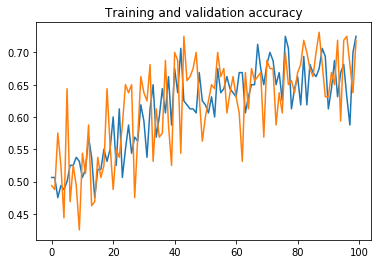

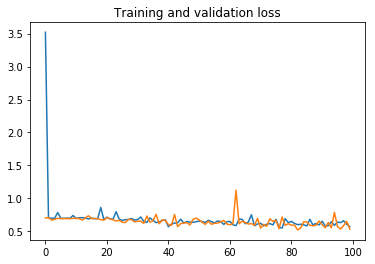

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )